# Term Project for DataMining

# Data can be found from https://www.kaggle.com/jvanelteren/boardgamegeek-reviews

# Goal of this assingment is given the review, predict the rating.

In [99]:
import numpy as np
import pandas as pd
import re
import string
import nltk
pd.options.mode.chained_assignment = None


## Load data

In [2]:
original_data = pd.read_csv('bgg-15m-reviews.csv')

In [3]:
comment_rate = pd.DataFrame(original_data, columns=['comment', 'rating']).dropna()

## Remove garbage string from comments

In [4]:
def clean_text(text):
    text = text.lower().strip()
    text = " ".join([w for w in text.split() if len(w) > 2])
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [5]:
comment_rate["comment"]=comment_rate["comment"].apply(clean_text)

## Remove empty string

In [6]:
nan_value = float("NaN")
comment_rate.replace("", nan_value, inplace=True)
comment_rate.dropna(subset = ["comment"], inplace=True)

## Split data into traing (80%) and test (20%) 

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(comment_rate, test_size=0.2)

## Tokenize the string 

In [8]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

In [9]:
train["comment"] = train["comment"].apply(tokenizer.tokenize)

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14694\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Remove unnecessary words when predicting rate for review

In [11]:
def remove_stopwords(word_tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
            
    return filtered_sentence

In [12]:
train["comment"] = train["comment"].apply(remove_stopwords)

## Make dictionary with member of time the words occur in tatal review comments

In [13]:
train_word=train.explode('comment')

In [14]:
word_all_rate=train_word.comment.value_counts(ascending=True)

## Remove words that present less than 10 times

In [15]:
word_all_rate=word_all_rate[word_all_rate > 10]

In [16]:
word_all_rate

matchmaking             11
apres                   11
computerization         11
drole                   11
anticiper               11
                    ...   
one                 426239
fun                 461670
like                464475
play                663642
game               2269345
Name: comment, Length: 63160, dtype: int64

## Build vocabulary list for each rate with number of time the words appears in the rate

In [17]:
word_rate_1=train_word.loc[(train_word['rating'] >= 0) & (train_word['rating'] <= 1.999)]
word_rate_1=word_rate_1.comment.value_counts(ascending=True)
word_rate_1=word_rate_1[word_rate_1 > 10]

word_rate_2=train_word.loc[(train_word['rating'] >= 2) & (train_word['rating'] <= 2.999)]
word_rate_2=word_rate_2.comment.value_counts(ascending=True)
word_rate_2=word_rate_2[word_rate_2 > 10]


word_rate_3=train_word.loc[(train_word['rating'] >= 3) & (train_word['rating'] <= 3.999)]
word_rate_3=word_rate_3.comment.value_counts(ascending=True)
word_rate_3=word_rate_3[word_rate_3 > 10]


word_rate_4=train_word.loc[(train_word['rating'] >= 4) & (train_word['rating'] <= 4.999)]
word_rate_4=word_rate_4.comment.value_counts(ascending=True)
word_rate_4=word_rate_4[word_rate_4 > 10]


word_rate_5=train_word.loc[(train_word['rating'] >= 5) & (train_word['rating'] <= 5.999)]
word_rate_5=word_rate_5.comment.value_counts(ascending=True)
word_rate_5=word_rate_5[word_rate_5 > 10]


word_rate_6=train_word.loc[(train_word['rating'] >= 6) & (train_word['rating'] <= 6.999)]
word_rate_6=word_rate_6.comment.value_counts(ascending=True)
word_rate_6=word_rate_6[word_rate_6 > 10]


word_rate_7=train_word.loc[(train_word['rating'] >= 7) & (train_word['rating'] <= 7.999)]
word_rate_7=word_rate_7.comment.value_counts(ascending=True)
word_rate_7=word_rate_7[word_rate_7 > 10]


word_rate_8=train_word.loc[(train_word['rating'] >= 8) & (train_word['rating'] <= 8.999)]
word_rate_8=word_rate_8.comment.value_counts(ascending=True)
word_rate_8=word_rate_8[word_rate_8 > 10]


word_rate_9=train_word.loc[(train_word['rating'] >= 9) & (train_word['rating'] <= 9.999)]
word_rate_9=word_rate_9.comment.value_counts(ascending=True)
word_rate_9=word_rate_9[word_rate_9 > 10]


word_rate_10=train_word.loc[(train_word['rating'] >= 10)]
word_rate_10=word_rate_10.comment.value_counts(ascending=True)
word_rate_10=word_rate_10[word_rate_10 > 10]



In [18]:
word_rate_list=[word_rate_1,word_rate_2,word_rate_3,word_rate_4,word_rate_5,word_rate_6,word_rate_7,word_rate_8
               ,word_rate_9,word_rate_10]

In [19]:
rate = ["1_","2_","3_","4_","5_","6_","7_","8_","9_","10_","predict"]

## Build Naive_bayes Classifier with smoothing
### If words don't appear in a certain rate vocabulary that we build, then the probability estimate for that words in the rate will be zero even though other words in the comment represent some probability.


![tile](smoothing.png)


In [20]:
def naive_bayes(text,word_all_rate,word_rate_1,smoothing):
    if smoothing != True:
        if (text in word_all_rate) & (text in word_rate_1):
            return word_rate_1[text]/word_rate_1.size
        else: 
            return 0
    else:
        if (text in word_all_rate) & (text in word_rate_1):
            return (word_rate_1[text]+1)/(word_rate_1.size+10)

        else:
            return 1/(word_rate_1.size+10)

In [21]:
def predict_rate(df,word_all_rate,word_rate_list,rate):
    df["comment"] = df["comment"].apply(tokenizer.tokenize)
    df["comment"] = df["comment"].apply(remove_stopwords)
    exploded = df.explode('comment')
    
    
    for i in range (10):
        exploded[i+1] = exploded['comment'].apply(
        lambda x: naive_bayes(x,word_all_rate,word_rate_list[i-1],1))
    
    

    for i in df.index:
        ff=exploded.loc[exploded.index == i].prod();
        max_ = -1
        position=0
        for j,k in zip(range(10), rate):
            df.loc[df.index == i,k]=ff[j+1]
            if max_<ff[j+1]:
                max_=ff[j+1]
                position=j+1
        df.loc[df.index == i,"predict"] = position
    
    return df

## Since data is big, use 500 rows from test dataset to calculate model's accuracy 

In [36]:
test_reduce_num=test[:500]

In [37]:
test_reduce_num=predict_rate(test_reduce_num,word_all_rate,word_rate_list,rate)

## If the error of prediction is +=1 then accept it. 
### For example, the prediction of the comment is 5 and the actual rating is 6 or 4 then accept it

In [38]:
test_reduce_num["correct"]=np.where((test_reduce_num['rating'] <= test_reduce_num['predict']+1) & (test_reduce_num['rating'] >= test_reduce_num['predict']-1)
                     , 1, 0)

In [39]:
test_reduce_num

,comment,rating,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,predict,correct
11792201,"[favorite, campaign, system, battletactics, ga...",9.0,4.357953e-10,2.432849e-20,3.094448e-19,1.532364e-17,7.185050e-15,3.891256e-13,1.444148e-10,2.494040e-09,4.968360e-09,9.312266e-10,9.0,1
3550422,"[ticket, snoozefest, box, hyped, overrated, le...",2.0,1.780608e-12,3.612821e-11,4.198545e-10,8.197959e-10,3.096460e-09,8.672496e-09,1.853629e-08,4.696758e-09,5.793821e-11,7.867896e-12,7.0,0
11027922,"[almostmasterpiece, peer, sylvester, counterin...",9.0,2.263048e-54,6.531339e-64,3.972305e-60,6.326502e-58,5.986543e-55,5.168541e-53,3.346123e-48,4.078309e-47,6.778804e-48,1.035107e-49,8.0,1
8354526,"[hard, get, one, play, really, enjoy]",7.0,8.860009e-01,2.009505e-03,2.834760e-02,1.841992e-01,1.028256e+00,3.970425e+00,2.556893e+01,5.358394e+01,3.200638e+01,5.529133e+00,8.0,1
12208157,"[pretty, decent, game, time, die, neuen, entde...",5.0,8.805833e-21,1.207583e-26,1.901065e-24,4.680704e-21,3.397362e-17,4.321297e-15,1.470344e-11,1.681193e-11,2.715754e-13,1.123134e-17,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506990,"[play, mostly, nostalgia, value]",7.0,4.020443e-04,1.960343e-05,2.059183e-04,6.676991e-04,2.351291e-03,5.964180e-03,1.052370e-02,6.707620e-03,2.805359e-03,6.967032e-04,7.0,1
15360225,"[hoher, spaßfaktor, geschicklichkeit, wird, au...",7.0,1.638998e-29,2.054501e-29,2.523569e-29,4.889176e-29,2.060241e-29,1.116007e-27,7.032096e-26,1.642511e-25,6.986847e-27,4.524459e-29,8.0,1
1471851,[gorgeous],8.0,5.042507e-02,4.670472e-03,9.437260e-03,1.687515e-02,2.585975e-02,3.542549e-02,5.076721e-02,6.931243e-02,7.838910e-02,6.833548e-02,9.0,1
3669765,"[pros, unique, mindreading, achievements, coop...",10.0,8.637558e-21,1.452902e-29,1.165753e-27,2.263062e-25,6.516764e-24,4.060882e-21,7.348314e-18,5.461316e-17,4.501828e-17,1.778066e-19,8.0,0


## Calulate accuracy for Naive_bayes Classifier with smoothing

In [40]:
accuracy=test_reduce_num.loc[test_reduce_num['correct'] == 1].shape[0]/test_reduce_num.shape[0]
print("accuracy = ",accuracy,"\n\n\n")

accuracy =  0.544 





In [45]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [79]:
text = word_all_rate.sort_values(ascending=False)

In [80]:
text=text[:100]

In [81]:
text = text.index.map(str)

In [89]:
listToStr = ' '.join(map(str, text.format())) 

## Create Word cloud to visualize which words are frequently used

In [ ]:
!pip install wordcloud

In [104]:
# Import packages
import numpy as np
from PIL import Image


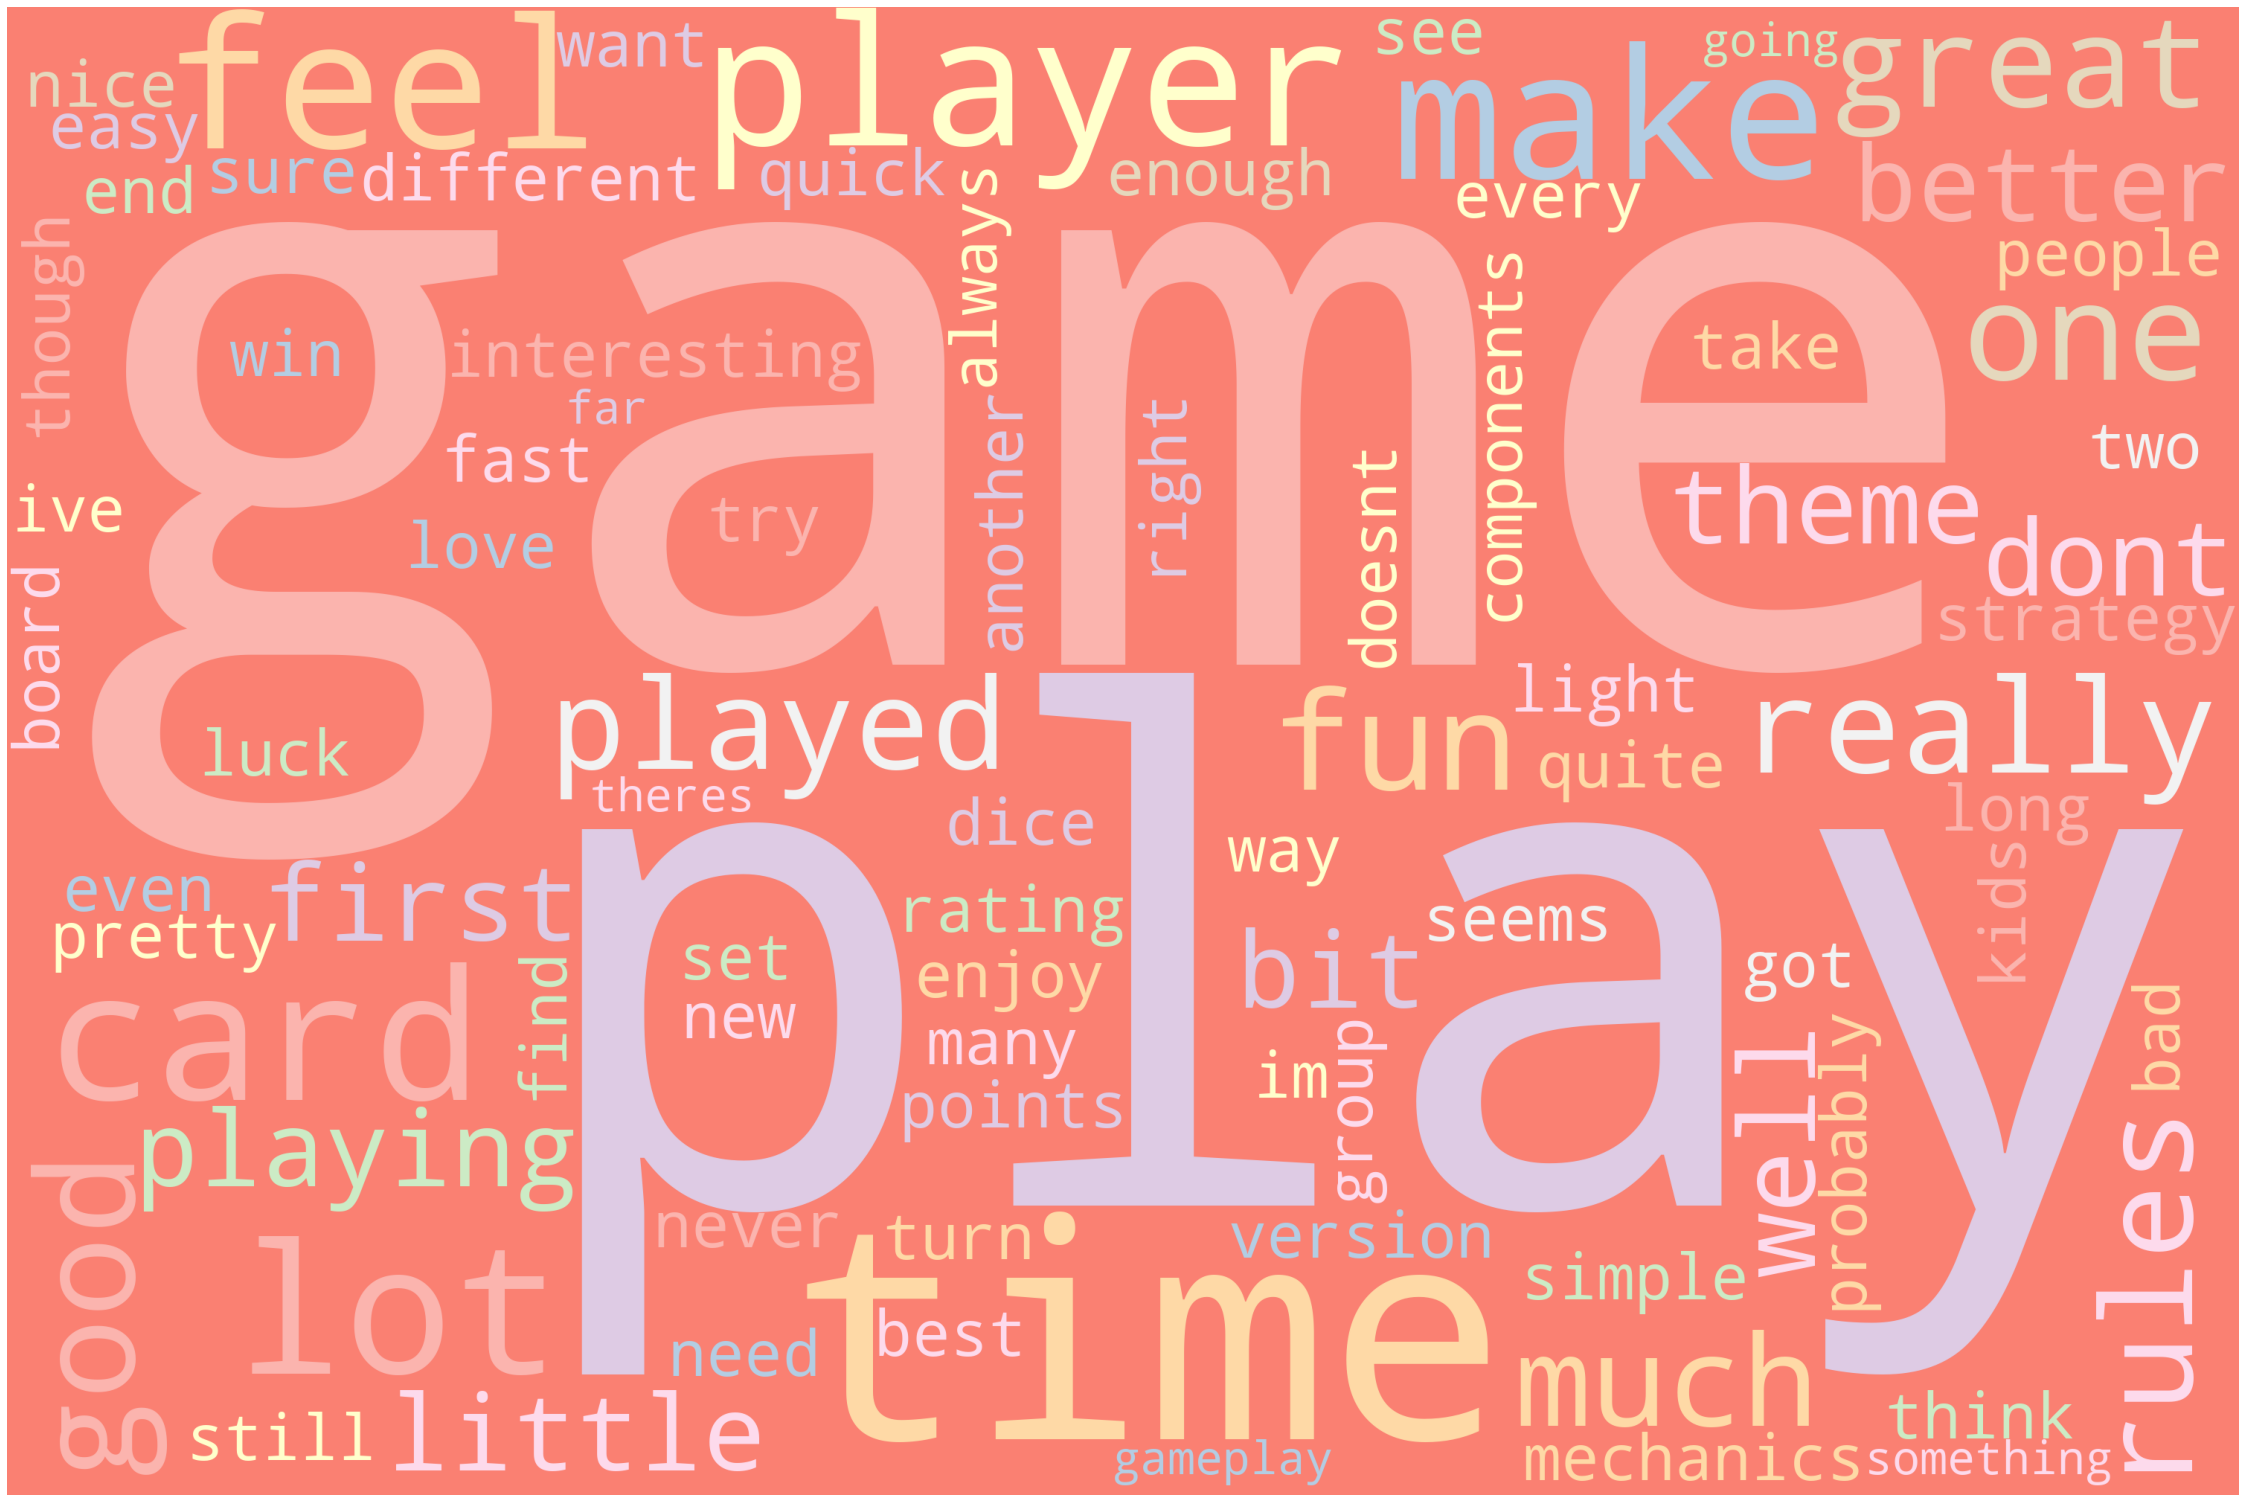

In [106]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(listToStr)
# Plot
plot_cloud(wordcloud)

# Test with input

In [43]:
input_test=input()
df = pd.DataFrame([[input_test]] , columns = ['comment']) 
print("Processing your comment\n\n\n")
result = predict_rate(df,word_all_rate,word_rate_list,rate)
print("The rate prediction for your comment is ",result["predict"][0])

this movie is fun
Processing your comment



The rate prediction for your comment is  8.0



# Challenge
##### When I calcuate the accuracy for the classifier, initial value was 15%. I decide to accpet some error +1 and -1 from predicting rate. If the actual rate is within the range of predicting value, accept it. It makes more sense because some rating contain decimal points. It is hard to predict exact rate for the comment. 

## Explain the basic algorithms
### &emsp; Soner Yuldirim in his post on towardsdatascience.com explains that "Naive Bayes is a supervised learning algorithm used for classification tasks. Hence, it is also called Naive Bayes Classifier. As other supervised learning algorithms, naive bayes uses features to make a prediction on a target variable. The key difference is that naive bayes assumes that features are independent of each other and there is no correlation between features. However, this is not the case in real life. This naive assumption of features being uncorrelated is the reason why this algorithm is called “naive”."

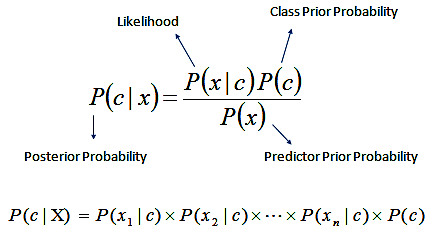
    


![tile](example_NBC.png)

# Evaluating my Naive Bays model
### I would say its 50 out of 100 because there are few more thing that I can make changes to improve accuracy

# Reference

##### https://scikit-learn.org/stable/modules/naive_bayes.html                   (Explain General Algorithm about Naive Bays)
#### https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed (Explain General Algorithm about Naive Bays)
##### https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5   (Word Cloud)
##### My previous Naive Bayes Classifier (Reuse Code from assignment for movie review)